In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plaksha-23-ml-1-final-project/sample_submission.csv
/kaggle/input/plaksha-23-ml-1-final-project/train.csv
/kaggle/input/plaksha-23-ml-1-final-project/test.csv
/kaggle/input/trace-lhc/SUSY.csv


In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/plaksha-23-ml-1-final-project/train.csv")
df.head()

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [10]:
X_train = df.iloc[:, :-1]
y_train = df.iloc[:,-1]



In [11]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X_train)

# # Perform PCA
# pca = PCA(n_components=4)
# X_transformed = pca.fit_transform(X)
# X_transformed
#print(pca.explained_variance_ratio_)

# How I started the Kaggle Competition.

- First I used PCA to reduce the number of features in hope of assembling weak learners but the results were not satisfactory.
- I used 4 Features which were resulting into ~60% variance and thus we got 73 % accuracy with Logistical Regression.
- I also used Random Forest with n_estimators = 100 - 400. Still the accuracy range stayed between 78-79.5 %.
- Since the accuracy was way below 80% for both our models we dropped the idea of using voting classfier.

In [12]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# X = scale.fit_transform(X_train)
# scaled_X = pd.DataFrame(X, columns=[X_train.columns])
# scaled_X

The above scaling method was removed as not using scaling was giving us a better accuracy in most of the trials.

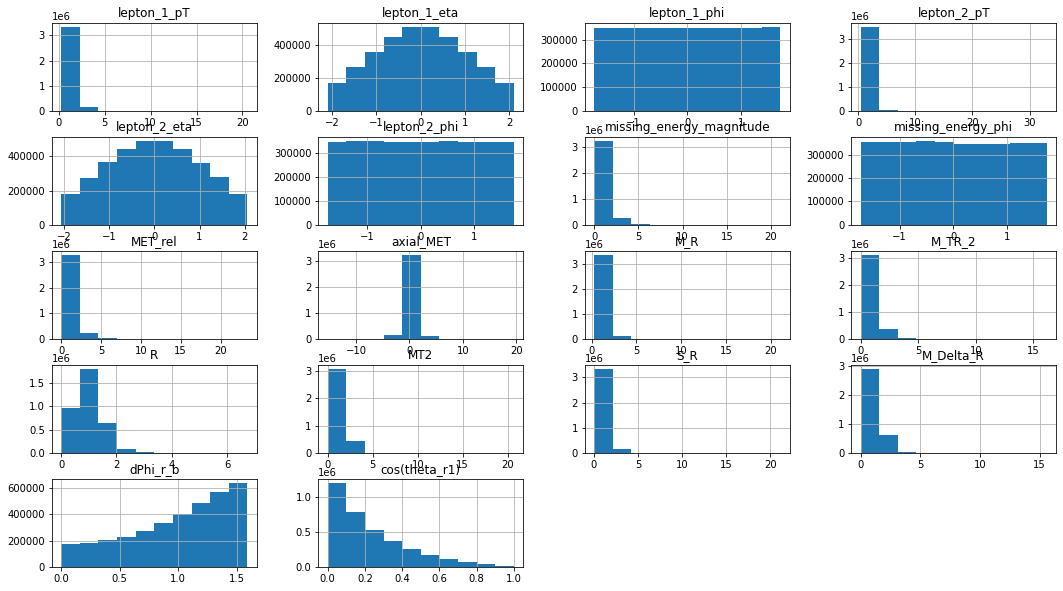

In [21]:
import matplotlib.pyplot as plt
X_train.hist(figsize=(18,10))
plt.show()

# - Hands on Feature Engineering ! Failed
Based on the above histogram we used some feature mixing to see if we were going in the right direction. This was also inspired from some papers available on the internet on this dataset.We used a couple of methods where we took the absolute difference between lepton_1_pT and lepton_2_pT and created diff_lepton_pT column and used it as a feature for our model and dropped lepton_1_pT and lepton_2_pT.

#df['diff_lepton_pT'] = pd.Series.abs(df['lepton_1_pT'] - df['lepton_2_pT'])

We did the same for columns lepton_1_eta and lepton_2_eta.


Things that we noticed while using the dataset with this transformation i.e using 16 feature instead of the 18 features
- We used the xgboost classifier and noticed that the test accuracy went down to 79.5. In order to verfy it, we used the model to test the entire dataset and it was still ~79.5.

In [20]:
print("0:",df['class'].value_counts()[0.0])
print("1:",df['class'].value_counts()[1.0])

print("Difference:", df['class'].value_counts()[0.0]-df['class'].value_counts()[1.0])



0: 1899670
1: 1600330
Difference: 299340


# Class Imbalance!
We noticed that while in terms of percenatge the class imbalance might not sound that much, but the number of datapoints of one class compared to the other class has a difference of 299340 which is good enough to make a model bias towards one class.

- Thus during the hyperparamter tuning we used the **Stratified sampling** to make sure that the data is being cross validated in the same ratio as to the original propotion.

# Reasons for using Xgboost:
- We needed a boosting algorithm and thus we went for xgboost as it had the ability to use GPU in kaggle. We also tried our hands on Adaboosting but realised that it was taking too much time
- Another reason was the speed and performance that comes with xgboost. Xgboost has the ability to not overfit with the regulrization parameters that comes along with it.

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold

# params = {
#         'min_child_weight': [10,11,13],
#         'gamma': [0.5, 0.6, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [5,7,8,9,11,13],
        
#         }

# xgb = XGBClassifier(tree_method="gpu_hist",learning_rate=0.02, n_estimators=300, objective='binary:logistic',
#                     silent=True, alpha = 0.05, nthread=-1)

# folds = 5
# param_comb = 10

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


# #random_search.fit(scaled_X, y_train)
# random_search.fit(X_train, y_train)

In [ ]:
#Using the parameters from the tuning above to make our model.

from xgboost import XGBClassifier
model = XGBClassifier(tree_method="gpu_hist", subsample = 0.8, min_child_weight=11,
                     max_depth=11, gamma=1.5,colsample_bytree=1, n_estimators=500, learning_rate=0.02, alpha = 0.05, nthread=1)
model.fit(X_train, y_train)

In [ ]:
test = pd.read_csv("/kaggle/input/plaksha-23-ml-1-final-project/test.csv")
test.drop(['Unnamed: 0'], axis=1, inplace=True)


In [ ]:
y_pred = model.predict(test)
y_df=pd.DataFrame(y_pred)
y_df.set_axis(['class'], axis='columns', inplace=True)
y_df.index.name='Id'
y_df['class']=y_df['class'].astype(float)
y_df.to_csv("submission18.csv")

# Accuracy : 0.80416

In [ ]:
# X2 = pd.read_csv('/kaggle/input/trace-lhc/SUSY.csv', names=['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
#        'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
#        'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
#        'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])


# X2.head()

In [ ]:
# y2 = pd.read_csv('/kaggle/input/trace-lhc/SUSY.csv', names=['class'] , usecols=[0])
# y2.head()

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

In [ ]:
# predsfinal = model.predict(X2)
# print(accuracy_score(y2,predsfinal))
# print(classification_report(y2,predsfinal))